# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Load dataset
red_df = pd.read_csv("../data/winequality-red.csv", sep=';')
white_df = pd.read_csv("../data/winequality-white.csv", sep=';')

# Tambahkan kolom wine_type
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Gabungkan dataset
wine_df = pd.concat([red_df, white_df], axis=0).reset_index(drop=True)

print("Total data:", wine_df.shape)
print(wine_df.head())

Total data: (6497, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

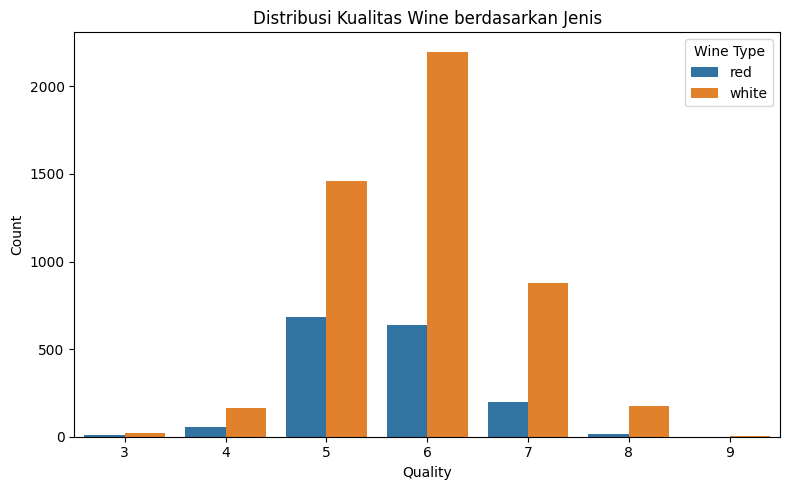

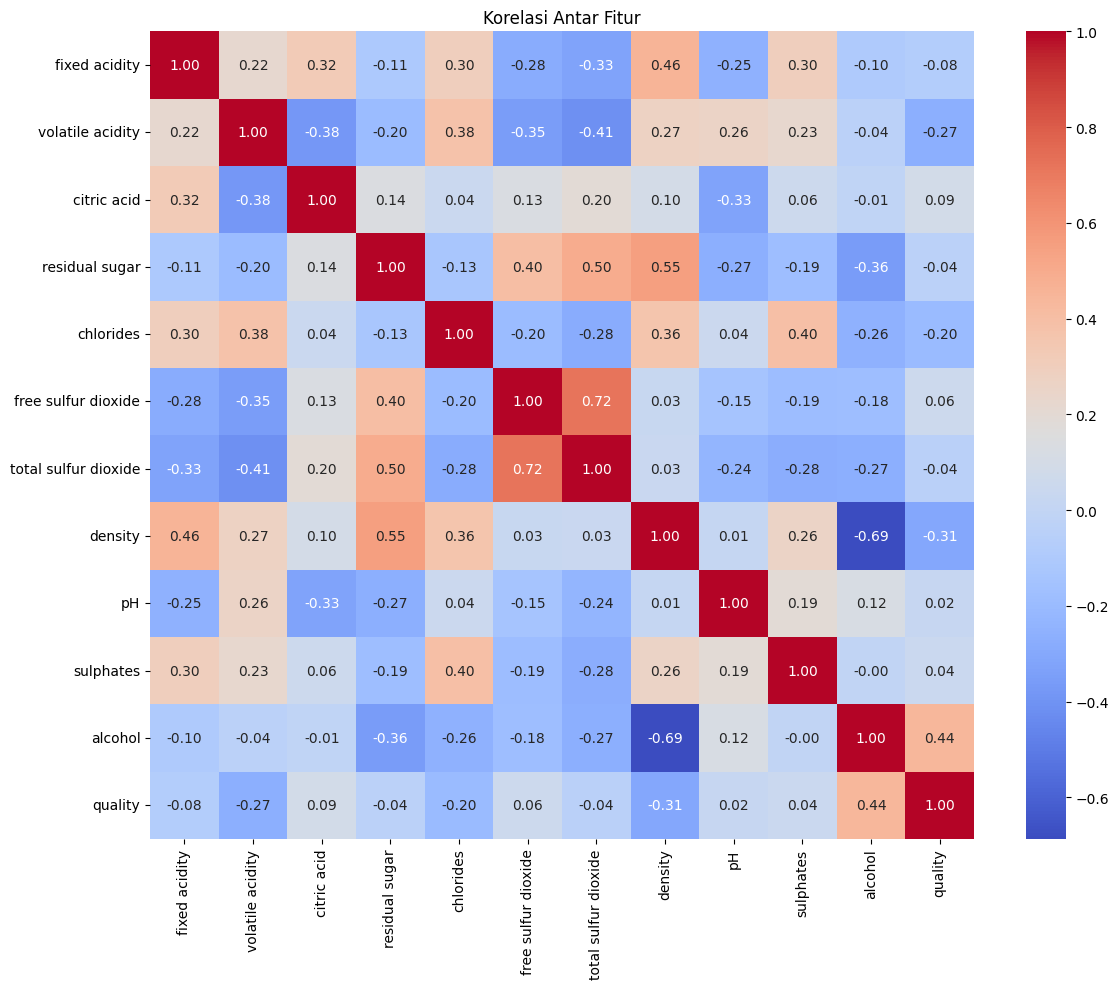


Jumlah Missing Value Tiap Kolom:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Statistik Deskriptif:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000    

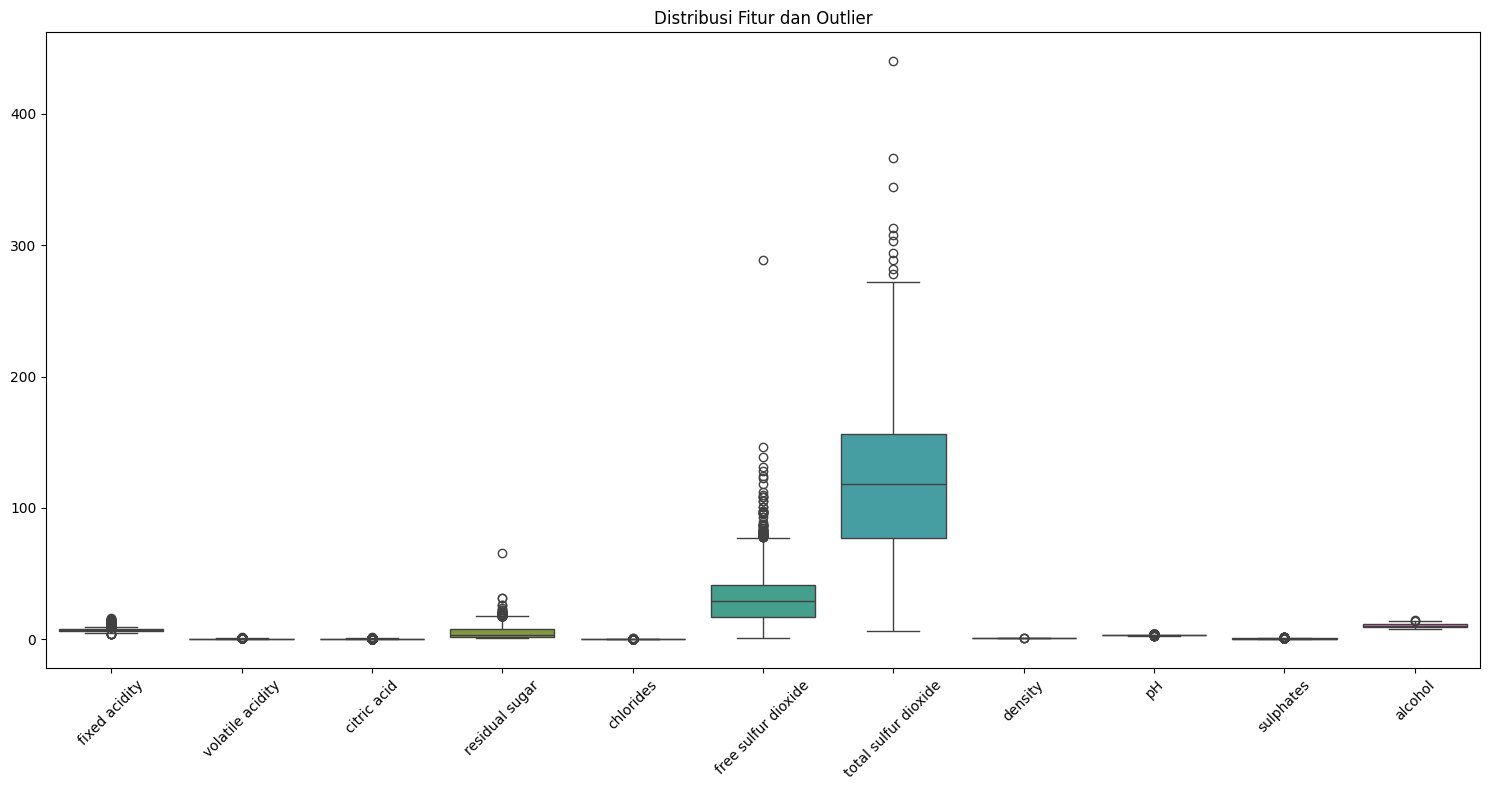

In [6]:
# Cek distribusi kualitas wine
plt.figure(figsize=(8, 5))
sns.countplot(data=wine_df, x='quality', hue='wine_type')
plt.title('Distribusi Kualitas Wine berdasarkan Jenis')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.drop('wine_type', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

# Cek missing values
print("\nJumlah Missing Value Tiap Kolom:")
print(wine_df.isnull().sum())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(wine_df.describe())

# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 8))
sns.boxplot(data=wine_df.drop(columns=['quality', 'wine_type']))
plt.title('Distribusi Fitur dan Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Encode kolom kategorikal 'wine_type'
le = LabelEncoder()
wine_df['wine_type'] = le.fit_transform(wine_df['wine_type'])  # red=1, white=0

# Pisahkan fitur dan target
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData setelah preprocessing:")
print(X_scaled_df.head())

# Simpan dataset preprocessing manual
X_scaled_df['quality'] = y
X_scaled_df.to_csv("winequality_preprocessed.csv", index=False)
print("\nDataset hasil preprocessing disimpan sebagai winequality_preprocessed.csv")


Data setelah preprocessing:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  wine_type  
0 